<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [155]:
import pandas as pd
import psycopg2
import warnings

warnings.filterwarnings('ignore')   #убираем сообщения про "pandas only supports SQLAlchemy connectable"

In [156]:
# вставьте сюда параметры подключения 
DBNAME = ' '
USER = ' '
PASSWORD = ' '
HOST = ' '
PORT = 

In [157]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [158]:
# текст запроса
query_3_1 = f'''
select 
	count(id)
from 
	public.vacancies
'''

In [159]:
# результат запроса
query_3_1_df =  pd.read_sql_query(query_3_1, connection)
query_3_1_df.iloc[0]['count']

49197

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [160]:
# текст запроса
query_3_2 = f'''
select 
	count(id)
from 
	public.employers
'''

In [161]:
# результат запроса
query_3_2_df = pd.read_sql_query(query_3_2, connection)
query_3_2_df.iloc[0]['count']

23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [162]:
# текст запроса
query_3_3 = f'''
select 
	count(id)
from 
	public.areas
'''

In [163]:
# результат запроса
query_3_3_df = pd.read_sql_query(query_3_3, connection)
query_3_3_df.iloc[0]['count']

1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [164]:
# текст запроса
query_3_4 = f'''
select 
	count(distinct industry_id)
from 
	public.employers_industries
'''

In [165]:
# результат запроса
query_3_4_df = pd.read_sql_query(query_3_4, connection)
query_3_4_df.iloc[0]['count']

294

***

## <em>  Выводы 

<em><font color=Red>

1) В базе данных содержится достаточное количество записей, чтобы применять методы статистического анализа, очистки данных. 
<em><font color=Red>

2) Количество регионов предполагает наличие вакансий не только в России, а и за ее пределами, а также возможно иное деление на регионы, чем принято согласно кодам субъектов Российской Федерации.  </font></em>

***


# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [166]:
# текст запроса
query_4_1 = f'''
select 
	a.name region,
	count(v.id) vacancies_per_region
from 
	public.vacancies v
join 
	public.areas a on a.id=v.area_id
group by region
order by vacancies_per_region desc
'''

In [167]:
# результат запроса
query_4_1_df = pd.read_sql_query(query_4_1, connection)
query_4_1_df

,region,vacancies_per_region
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [168]:
# текст запроса
query_4_2 = f'''
select 
	count (id)	
from 
	public.vacancies
where salary_from is not null or salary_to is not null
'''

In [169]:
# результат запроса
query_4_2_df = pd.read_sql_query(query_4_2, connection)
query_4_2_df.iloc[0]['count'] #выводим значение первой строки столбца count

24073

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [170]:
# текст запроса
query_4_3 = f'''
select 
	round(avg (salary_from)) salary_from,
	round(avg (salary_to)) salary_to
from 
	public.vacancies
'''

In [171]:
# результат запроса
query_4_3_df = pd.read_sql_query(query_4_3, connection)
query_4_3_df

,salary_from,salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [172]:
# текст запроса
query_4_4 = f'''
select 
	schedule,
	employment,
	count(id)
from 
	public.vacancies
group by schedule, employment
order by count desc
'''

In [173]:
# результат запроса
query_4_4_df = pd.read_sql_query(query_4_4, connection)
query_4_4_df

,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [174]:
# текст запроса
query_4_5 = f'''
select 
	experience work_experience
from 
	public.vacancies
group by work_experience
order by count(id) asc --считаем количество вакансий, сгруппированных по опыту
'''

In [175]:
# результат запроса
query_4_5_df = pd.read_sql_query(query_4_5, connection)
query_4_5_df

,work_experience
0,Более 6 лет
1,Нет опыта
2,От 3 до 6 лет
3,От 1 года до 3 лет


***

## <em> Дополнительные исследования вакансий</em>

In [176]:
#Для большего понимания распределения вакансий по городам, выделим Москву, Санкт-Петербург
#отдельно, города-миллионники отдельно и остальные города отдельно и посмотрим, какое количество вакансий представлено 
#в каждой категории
million_cities=['Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 
                'Челябинск', 'Красноярск', 'Самара', 'Уфа', 
                'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 
                'Пермь', 'Волгоград']
capitals = ['Москва', 'Санкт-Петербург']
query_4_1_df['Город'] = query_4_1_df['region'].apply(
    lambda x: 'город-миллионник' if x in million_cities else x if x in capitals else 'другие'
)
100*query_4_1_df.groupby('Город').sum()/query_4_1_df['vacancies_per_region'].sum() #относительное число вакансий в регионе (в процентах%)


,vacancies_per_region
Город,
Москва,10.840092
Санкт-Петербург,5.795069
город-миллионник,31.855601
другие,51.509238


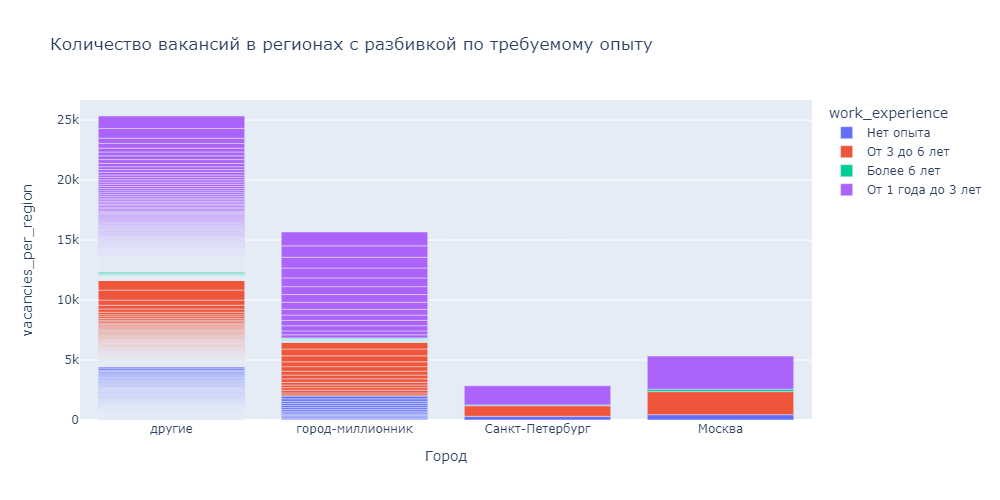

In [177]:
#посмотрим распределение количества вакансий в регионе в зависимости от требуемого опыта и посмотрим график
import plotly.express as px
region_experience_query=f'''
select
	a.name region,
	v.experience work_experience,
	count(v.id) vacancies_per_region
from 
	public.vacancies v
join 
	public.areas a on a.id=v.area_id
group by work_experience, region
order by count(v.id) asc --считаем количество вакансий, сгруппированных по опыту
'''
region_experience_query_df=pd.read_sql_query(region_experience_query, connection)
region_experience_query_df['Город'] = region_experience_query_df['region'].apply(
    lambda x: 'город-миллионник' if x in million_cities else x if x in capitals else 'другие'
)
fig = px.bar(
    region_experience_query_df, 
    x = "Город",
    y = 'vacancies_per_region',
    color ='work_experience',
    height = 500, 
    width = 1000, 
    title = 'Количество вакансий в регионах с разбивкой по требуемому опыту',
)
fig.show('png')

***
## <em> Выводы 

<font color=Red>

1) Существенная доля вакансий (больше 50%) представлена для малых и зарубежных городов

2) В этих городах  также достаточно велика доля вакансий с отсутствием требуемого опыта или с малым требуемым опытом

3) Из информации по таблице с вакансиями видно, что часть колонок 'key_skills' не заполнена, вероятно, часть требований к навыкам представлена в колонке experience, что потребует преобразования данных в этой колонке для выделения требуемых ключевых навыков, если потребуется использовать их в дальнейшем 

</font></em>

***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [178]:
# текст запроса
query_5_1 =  f'''
select *
from
(
     -- формируем селект с помощью функции row_number, которая нумерует строки, возвращаемые запросом и
	 -- позволит вывести только 1 и 5 строку запроса. 
select 
	row_number() over (order by count(v.id) desc) as row_number,
	e.name employer_name,
	count(v.id) number_of_vacancies
from 
	public.vacancies v
join 
	public.employers e on v.employer_id = e.id
group by employer_name
) as table_temp
where table_temp.row_number=1 or table_temp.row_number=5
'''

In [179]:
# результат запроса
query_5_1_df = pd.read_sql_query(query_5_1, connection)
# альтернативный способ вывода строки 1 и 5 - через функции Python (без применения row_number()), 
# но был использован row_number для 'тренировки'. Вариант вывода через Python: ' print(query_5_1_df.loc[[0,4]]) '
query_5_1_df

,row_number,employer_name,number_of_vacancies
0,1,Яндекс,1933
1,5,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [180]:
# текст запроса
query_5_2 = f'''
--так как регион вакансии прописан в самой вакансии и он может не совпадать с регионом работодателя,
--создаем временную таблицу, куда заносим количество работодателей по регионам 

with employers_count_table as 
(
select
    a.name,
    count(e.id) employers_count
from 
    public.areas a
left join 
    public.employers e on a.id=e.area
group by a.name
order by employers_count desc
)

--создаем таблицу, где отдельно считаем количество вакансий по регионам, затем объединяем с первой таблицей employers_count_table
--в получившейся таблице имеем три столбца: регион, количество вакансий в нем и количество компаний в этом регионе.

select  
    a.name region,
    count(v.id) vacancies_count,
    e.employers_count
from public.areas a
left join 
    public.vacancies v on a.id=v.area_id
left join 
    employers_count_table e on a.name = e.name
group by a.name, e.employers_count
order by vacancies_count asc, e.employers_count desc
'''

In [181]:
# результат запроса
query_5_2_df = pd.read_sql_query(query_5_2, connection)
display(query_5_2_df)

,region,vacancies_count,employers_count
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Беларусь,0,18
...,...,...,...
1357,Алматы,1892,721
1358,Новосибирск,2006,573
1359,Минск,2112,1115
1360,Санкт-Петербург,2851,2217


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [182]:
# текст запроса
query_5_3 = f''' 
select 
--считаем количество регионов, используя уникальное значение area_id, так как вакансий у работодателя в регионе может быть много
     count(distinct area_id) "# of regions with vacancies" 
from 
     public.vacancies
group by employer_id
order by count(distinct area_id) desc
'''

In [183]:
# результат запроса
query_5_3_df = pd.read_sql_query(query_5_3, connection)
query_5_3_df

,# of regions with vacancies
0,181
1,152
2,116
3,88
4,71
...,...
14901,1
14902,1
14903,1
14904,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [184]:
# текст запроса
query_5_4 = f''' 
select 
	e.name,
    count(distinct ei.industry_id)
from 
    public.employers e
left join 
    public.employers_industries ei on e.id=ei.employer_id
group by e.id
having count(distinct ei.industry_id) = 0  --фильтруем select по работодателям, у которых не указан industry_id
'''

In [185]:
# результат запроса
query_5_4_df = pd.read_sql_query(query_5_4, connection)
query_5_4_df.shape[0]

8419

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [186]:
# текст запроса
query_5_5 = f''' 
select 
	e.name,
    count(ei.industry_id)
from 
    public.employers e
left join 
    public.employers_industries ei on e.id=ei.employer_id
group by e.id
having count(ei.industry_id)=4
order by e.name asc
'''

In [187]:
# результат запроса
query_5_5_df = pd.read_sql_query(query_5_5, connection)
query_5_5_df.iloc[2]['name']

'2ГИС'

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [188]:
# текст запроса
query_5_6 = f'''
select 
	count(ei.industry_id)
from 
	public.employers e
left join 
	public.employers_industries ei on e.id=ei.employer_id
left join 
	public.industries i on ei.industry_id=i.id
where i.name = 'Разработка программного обеспечения'
'''

In [189]:
# результат запроса
query_5_6_df = pd.read_sql_query(query_5_6, connection)
query_5_6_df.iloc[0]['count']

3553

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [190]:
# код для получения списка городов-милионников
#импортируем библиотеки для получения доступа к веб-странице и ее парсингу
import requests
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
from bs4 import BeautifulSoup
response = requests.get(url)  # Выполняем GET-запрос
page = BeautifulSoup(response.text, 'html.parser')
links = page.find_all('a') # Ищем все ссылки на странице и сохраняем в переменной links в виде списка
millionaires_list=[link.text for link in links[45:62]]
millionaires_list.remove('[a]') #удаляем элемент, который не является городом
print(millionaires_list)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Нижний Новгород', 'Челябинск', 'Красноярск', 'Самара', 'Уфа', 'Ростов-на-Дону', 'Омск', 'Краснодар', 'Воронеж', 'Пермь', 'Волгоград']


In [191]:
# текст запроса
query_5_7 = f''' 
select 
   a.name region_name,
   count(v.id) vacancies_count
from 
      public.areas a
join 
      public.vacancies v on a.id=v.area_id
join 
      public.employers e on e.id=v.employer_id
where  e.name='Яндекс' 
      --обращаемся к списку millionaires_list и берем только вакансии из городов этого списка
      and a.name like any (array{millionaires_list}) 
group by a.name
order by vacancies_count
'''

In [192]:
# результат запроса
query_5_7_df = pd.read_sql_query(query_5_7, connection)
#считаем 'Total' с помощью Python, а не методов SQL, так как этот прием более простой и лаконичный
query_5_7_df.loc[len(query_5_7_df.index)] = ['Total', sum(query_5_7_df['vacancies_count'])]
query_5_7_df

,region_name,vacancies_count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

 # <em> Выводы по анализу работодателей

 <font color=Red>

 1) Найдено определеное количество работодателей, у которых или нет вакансий или не описан род деятельности. Вероятно, среди них есть существенная доля тех, чьи акаунты или уже неактивны, или эти компании не развиваются активно, поэтом не нанимают или являются мелкими (ИП). Вероятно, эти компании стоит исключить из рекомендаций для потенциальных работников ищущих работу на позиции Data Science, которая предполагает работу с большими данными и соответствующими компаниями, которая или обладает или генерирует или активно оперирует большими данными. Мелкие и неактивные компании под этот критерий не подходит.

 
 2) В регионе "Россия" было найдено наибольшее количество работодателей у которых нет вакансий в этом регионе, видимо регион регистрации для работодателя требует уточнения, так как его адрес регистрации привязан к конкретному городу, а не к стране в целом. То же относится к областям, это позволит оценить более адекватно распределение работодателей и вакансий по регионам
 
</font></em>
 ***

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [193]:
# текст запроса
query_6_1 = f''' 
select 
    count(v.name)
from 
    public.vacancies  v
-- приводим значение столбца к нижнему регистру и проверяем его на совпадение
where lower(v.name) like '%данн%' or  lower(v.name) like '%data%'
'''

In [194]:
# результат запроса
query_6_1_df = pd.read_sql_query(query_6_1, connection)
query_6_1_df.iloc[0]['count']

1771

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [195]:
# текст запроса
query_6_2 = f''' 
select 
	count(v.id)
from public.vacancies  v
-- применяем подход с "like any array", для более лаконичного написания запроса
-- для ML применяем дополнительную проверку для исключения записей с 'html' из выборки
where 
    (lower(v.name) like any (array['%data scientist%',
                        '%data science%','%исследователь данных%',
                        '%machine learning%','%машинн%обучен%'])
                        or v.name like '%ML%') 
	                    and lower(v.name) not like '%html%'
                        and (lower(v.name) like '%junior%' 
                            or v.experience like '%Нет опыта%' 
                            or v.employment like '%Стажировка%')
 '''

In [196]:
# результат запроса
query_6_2_df = pd.read_sql_query(query_6_2, connection)
query_6_2_df.iloc[0]['count']

51

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [197]:
# текст запроса
query_6_3 = f''' 
select 
    count (v.id)
from public.vacancies  v
where 
    (lower(v.name) like any (array['%data scientist%',
                            '%data science%','%исследователь данных%',
                            '%machine learning%','%машинн%обучен%'])
                            or v.name like '%ML%')
                            and lower(v.name) not like '%html%' 
                            and (lower(v.key_skills) like '%sql%'  --доп проверка на навыки SQL, postgres
                                or lower(v.key_skills) like '%postgres%')
 '''


In [198]:
# результат запроса
query_6_3_df = pd.read_sql_query(query_6_3, connection)
query_6_3_df.iloc[0]['count']

201

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [199]:
# текст запроса
query_6_4 = f''' 
select 
    count (v.id)
from public.vacancies  v
where 
    (lower(v.name) like any (array['%data scientist%',
                            '%data science%','%исследователь данных%',
                            '%machine learning%','%машинн%обучен%'])
                            or v.name like '%ML%')
                            and lower(v.name) not like '%html%' 
                            and lower(v.key_skills) like '%python%' --доп проверка на навык python
 '''

In [200]:
# результат запроса
query_6_4_df = pd.read_sql_query(query_6_4, connection)
query_6_4_df.iloc[0]['count']

351

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [201]:
# текст запроса
# 
query_6_5 = f'''
select 
    round(avg
            (char_length(v.key_skills) 
            - (char_length(replace(v.key_skills,CHR(9),''))-1)),2) 
                     --- отнимаем единицу из вычитаемого числа выше, чтобы учесть первый навык, для которого нет табуляции(CHR(9))
from 
    public.vacancies  v
where
    (lower(v.name) like any (array['%data scientist%',
                            '%data science%','%исследователь данных%',
                            '%machine learning%','%машинн%обучен%'])
                            or v.name like '%ML%')
                            and lower(v.name) not like '%html%' 
'''

In [202]:
# результат запроса
query_6_5_df = pd.read_sql_query(query_6_5, connection)
query_6_5_df.iloc[0]['round']

6.41

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [203]:
# текст запроса
query_6_6 = f''' 
--применяем запрос с coalesce, который позволяет получить значение (salary_from или salary_to)
--в случае, если одна из этих колонок не заполнена
select 
	v.experience,
	round(avg((COALESCE(v.salary_from, v.salary_to)
			   + COALESCE(v.salary_to, v.salary_from))/2)) average_salary
from 
    public.vacancies v
where    
    (lower(v.name) like any (array['%data scientist%',
                            '%data science%','%исследователь данных%',
                            '%machine learning%','%машинн%обучен%'])
                            or v.name like '%ML%')
                            and lower(v.name) not like '%html%' 
							and (salary_from is not null or salary_to is not null)
group by v.experience
'''

In [204]:
# результат запроса
query_6_6_df = pd.read_sql_query(query_6_6, connection)
query_6_6_df

,experience,average_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

# <em> Выводы

<font color=red>

1) Несмотря на достаточную популярность термина Data Science, всего около 1% вакансий (~480 из ~49000) могут расцениваться как вакансии для Дата Сайентистов. При этом всего 51 вакансия рассчитана на джуниор специалиста, что, видимо, отражает тот факт, что работодатели всегда в описании резюме отражают скорее свои пожелания к кандидату, чем жесткие требования. Поэтому в рекомендательном алгоритме, я бы расслабил требования и джуниор специалистам также предлагал бы вакансии, у которых указан небольшой требуемый срок опыта (1-3 года)

2) Также возможно требуется более критично отнестись к критериям выборки вакансий и их определению как вакансии для дата сайентиста. Это позволит выделить больше потенциально интересных вакансий

3) Рост предлагаемой зарплаты для дата сайентиста растет стремительно, и уже при наличии 3 лет опыта он может рассчитывать на рост зарплаты более, чем в три раза по сравнению с джуниором

</font></em>

***

# <em>Общий вывод по проекту

<font color =red>

1) Очевидна нехватка квалифицированных специалистов в области Data Sciencе. Вывод сделан исходя из того факта, что джуниор специалистов готовы рассматривать всего в 51 вакансии, а специалистам даже с небольшим опытом в 3 и более лет готовы предлагать достаточно высокую зарплату
2) Необходимо также проанализировать данные на выбросу и неадекватные значения, чего пока мы не делали
3) Необходимо придумать способ выделения ключевых навыков для тех вакансий, которые они не указаны
4) Необходимо преобразовать список регионов для работодателей, чтобы не было "общих" регионов, таких как "Россия", "Краснодарский край" и тд
5) Дополнительно интересно посмотреть распределение запрлат (там, где указана хотя бы одна колонка с зарплатой) для разных регионов и опыта. Интересно отметить, что сразу выдялеются несколько зарубежных регионов-городов, наряду с Москвой и Санкт-Петербургом, также стоит отметить, что неопытных специалистов по дата сайенс не очень ждут за рубежом(по крайней мере не указывают для них зарплату)

</font></em>
***


In [205]:
query_additional = f''' 
select 
	a.name,
	v.experience,
	round(avg((COALESCE(v.salary_from, v.salary_to)
			   + COALESCE(v.salary_to, v.salary_from))/2)) average_salary
from 
	public.vacancies v
left join 
	public.areas a on v.area_id =a.id
where    
	(lower(v.name) like any (array['%data scientist%',
                            '%data science%','%исследователь данных%',
                            '%machine learning%','%машинн%обучен%'])
                            or v.name like '%ML%')
                            and lower(v.name) not like '%html%' 
							and (salary_from is not null or salary_to is not null)
group by a.name, v.experience
order by average_salary desc
'''
query_additional_df = pd.read_sql_query(query_additional, connection)
query_additional_df

,name,experience,average_salary
0,Кипр,От 3 до 6 лет,300000.0
1,Санкт-Петербург,От 3 до 6 лет,300000.0
2,Армения,От 3 до 6 лет,268863.0
3,Москва,От 3 до 6 лет,263750.0
4,Черногория,От 3 до 6 лет,233794.0
5,Сербия,От 3 до 6 лет,233794.0
6,Турция,От 3 до 6 лет,233794.0
7,Новосибирск,От 3 до 6 лет,209500.0
8,Белгород,От 3 до 6 лет,200000.0
9,Санкт-Петербург,От 1 года до 3 лет,175173.0
